<a href="https://colab.research.google.com/github/damianmtz98/PyCdeD/blob/main/T1_AnalisisEst_Libros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis estadistico
Vamos a realizar un análisis comparativo de los tres libros de Friedrich Nietzsche: "Thus Spake Zarathustra", "The Birth of Tragedy" y "Beyond Good and Evil". Descargaremos los textos desde el Proyecto Gutenberg, procesaremos y analizaremos los textos para obtener estadísticas descriptivas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
import requests

In [4]:
#URL libros
url_zarath = 'https://www.gutenberg.org/cache/epub/1998/pg1998.txt' #Thus Spake Zarathrustra
url_birth = 'https://www.gutenberg.org/cache/epub/51356/pg51356.txt' #The Birth Of Tragedy
url_gye = 'https://www.gutenberg.org/cache/epub/4363/pg4363.txt' # BEYOND GOOD AND EVIL

In [5]:
#Descargar libros
responses_zarath = requests.get(url_zarath)
text_zarath = responses_zarath.text

responses_birth = requests.get(url_birth)
text_birth = responses_birth.text

responses_gye = requests.get(url_gye)
text_gye = responses_gye.text

In [6]:
# Guardar los textos en archivos
with open('zarathustra.txt', 'w', encoding='utf-8') as file:
    file.write(text_zarath)

with open('birth_of_tragedy.txt', 'w', encoding='utf-8') as file:
    file.write(text_birth)

with open('beyond_good_and_evil.txt', 'w', encoding='utf-8') as file:
    file.write(text_gye)

In [7]:
# Cargar los textos desde los archivos
with open('zarathustra.txt', 'r', encoding='utf-8') as file:
    text_zarath = file.read()

with open('birth_of_tragedy.txt', 'r', encoding='utf-8') as file:
    text_birth = file.read()

with open('beyond_good_and_evil.txt', 'r', encoding='utf-8') as file:
    text_gye = file.read()

In [8]:
list_zarath = text_zarath.split("\n")
list_birth = text_birth.split("\n")
list_gye = text_gye.split("\n")

In [9]:
list_zarath[:30]

['\ufeffThe Project Gutenberg eBook of Thus Spake Zarathustra: A Book for All and None',
 '    ',
 'This ebook is for the use of anyone anywhere in the United States and',
 'most other parts of the world at no cost and with almost no restrictions',
 'whatsoever. You may copy it, give it away or re-use it under the terms',
 'of the Project Gutenberg License included with this ebook or online',
 'at www.gutenberg.org. If you are not located in the United States,',
 'you will have to check the laws of the country where you are located',
 'before using this eBook.',
 '',
 'Title: Thus Spake Zarathustra: A Book for All and None',
 '',
 'Author: Friedrich Wilhelm Nietzsche',
 '',
 'Translator: Thomas Common',
 '',
 'Release date: December 1, 1999 [eBook #1998]',
 '                Most recently updated: April 10, 2023',
 '',
 'Language: English',
 '',
 'Credits: Sue Asscher and David Widger',
 '        Revised by Richard Tonsing.',
 '',
 '',
 '*** START OF THE PROJECT GUTENBERG EBOOK THUS SPA

In [10]:
list_birth[:50]

['\ufeffThe Project Gutenberg eBook of The Birth of Tragedy; or, Hellenism and Pessimism',
 '    ',
 'This ebook is for the use of anyone anywhere in the United States and',
 'most other parts of the world at no cost and with almost no restrictions',
 'whatsoever. You may copy it, give it away or re-use it under the terms',
 'of the Project Gutenberg License included with this ebook or online',
 'at www.gutenberg.org. If you are not located in the United States,',
 'you will have to check the laws of the country where you are located',
 'before using this eBook.',
 '',
 'Title: The Birth of Tragedy; or, Hellenism and Pessimism',
 '',
 'Author: Friedrich Wilhelm Nietzsche',
 '',
 'Editor: Oscar Levy',
 '',
 'Translator: William A. Haussmann',
 '',
 'Release date: March 4, 2016 [eBook #51356]',
 '                Most recently updated: May 5, 2024',
 '',
 'Language: English',
 '',
 "Credits: Produced by Marc D'Hooghe (Images generously made available by the Hathi Trust.)",
 '',
 '',
 '***

In [11]:
list_gye[:20]

['\ufeffThe Project Gutenberg eBook of Beyond Good and Evil',
 '    ',
 'This ebook is for the use of anyone anywhere in the United States and',
 'most other parts of the world at no cost and with almost no restrictions',
 'whatsoever. You may copy it, give it away or re-use it under the terms',
 'of the Project Gutenberg License included with this ebook or online',
 'at www.gutenberg.org. If you are not located in the United States,',
 'you will have to check the laws of the country where you are located',
 'before using this eBook.',
 '',
 'Title: Beyond Good and Evil',
 '',
 'Author: Friedrich Wilhelm Nietzsche',
 '',
 'Translator: Helen Zimmern',
 '',
 'Release date: August 1, 2003 [eBook #4363]',
 '                Most recently updated: January 9, 2019',
 '',
 'Language: English']

In [12]:
libro_filtrado = list(filter(None,list_zarath))
libro_filtrado[:50]

['\ufeffThe Project Gutenberg eBook of Thus Spake Zarathustra: A Book for All and None',
 '    ',
 'This ebook is for the use of anyone anywhere in the United States and',
 'most other parts of the world at no cost and with almost no restrictions',
 'whatsoever. You may copy it, give it away or re-use it under the terms',
 'of the Project Gutenberg License included with this ebook or online',
 'at www.gutenberg.org. If you are not located in the United States,',
 'you will have to check the laws of the country where you are located',
 'before using this eBook.',
 'Title: Thus Spake Zarathustra: A Book for All and None',
 'Author: Friedrich Wilhelm Nietzsche',
 'Translator: Thomas Common',
 'Release date: December 1, 1999 [eBook #1998]',
 '                Most recently updated: April 10, 2023',
 'Language: English',
 'Credits: Sue Asscher and David Widger',
 '        Revised by Richard Tonsing.',
 '*** START OF THE PROJECT GUTENBERG EBOOK THUS SPAKE ZARATHUSTRA: A BOOK FOR ALL AND NONE 

In [13]:
libro_filtrado2 = list(filter(None,list_birth))
libro_filtrado2[:50]

['\ufeffThe Project Gutenberg eBook of The Birth of Tragedy; or, Hellenism and Pessimism',
 '    ',
 'This ebook is for the use of anyone anywhere in the United States and',
 'most other parts of the world at no cost and with almost no restrictions',
 'whatsoever. You may copy it, give it away or re-use it under the terms',
 'of the Project Gutenberg License included with this ebook or online',
 'at www.gutenberg.org. If you are not located in the United States,',
 'you will have to check the laws of the country where you are located',
 'before using this eBook.',
 'Title: The Birth of Tragedy; or, Hellenism and Pessimism',
 'Author: Friedrich Wilhelm Nietzsche',
 'Editor: Oscar Levy',
 'Translator: William A. Haussmann',
 'Release date: March 4, 2016 [eBook #51356]',
 '                Most recently updated: May 5, 2024',
 'Language: English',
 "Credits: Produced by Marc D'Hooghe (Images generously made available by the Hathi Trust.)",
 '*** START OF THE PROJECT GUTENBERG EBOOK THE BIR

In [14]:
libro_filtrado3 = list(filter(None,list_gye))
libro_filtrado3[:50]

['\ufeffThe Project Gutenberg eBook of Beyond Good and Evil',
 '    ',
 'This ebook is for the use of anyone anywhere in the United States and',
 'most other parts of the world at no cost and with almost no restrictions',
 'whatsoever. You may copy it, give it away or re-use it under the terms',
 'of the Project Gutenberg License included with this ebook or online',
 'at www.gutenberg.org. If you are not located in the United States,',
 'you will have to check the laws of the country where you are located',
 'before using this eBook.',
 'Title: Beyond Good and Evil',
 'Author: Friedrich Wilhelm Nietzsche',
 'Translator: Helen Zimmern',
 'Release date: August 1, 2003 [eBook #4363]',
 '                Most recently updated: January 9, 2019',
 'Language: English',
 'Credits: Produced by John Mamoun, Charles Franks, David Widger and the Online',
 '        Distributed Proofreading Team',
 '*** START OF THE PROJECT GUTENBERG EBOOK BEYOND GOOD AND EVIL ***',
 'Produced by John Mamoun, Charles

In [15]:
# Palabras no deseadas
unwanted_words = set(['project', 'gutenberg', 'ebook'])

In [16]:
# Función para limpiar y preprocesar texto
def preprocess_text(text):
    # Eliminar signos de puntuación y convertir a minúsculas
    texto_limpio = re.sub(r'[^\w\s]', '', text.lower())
    # Eliminar stopwords y palabras no deseadas
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(texto_limpio)
    texto_filtrado = [word for word in tokens if word not in stop_words and word not in unwanted_words]
    return texto_filtrado

In [17]:
# Limpiar y preprocesar los textos eliminando "Project" y "Gutenberg"
words_zarath = preprocess_text(text_zarath)
words_birth = preprocess_text(text_birth)
words_gye = preprocess_text(text_gye)

In [18]:
# Crear la frecuencia de palabras para cada libro
fdist_zarath = FreqDist(words_zarath)
fdist_birth = FreqDist(words_birth)
fdist_gye = FreqDist(words_gye)

In [19]:
# Convertir las frecuencias a DataFrames
df_zarath = pd.DataFrame(fdist_zarath.most_common(20), columns=['token', '#'])
df_birth = pd.DataFrame(fdist_birth.most_common(20), columns=['token', '#'])
df_gye = pd.DataFrame(fdist_gye.most_common(20), columns=['token', '#'])

In [20]:
df_zarath.head(5)

,token,#
0,thou,865
1,one,711
2,zarathustra,651
3,ye,635
4,hath,404


In [21]:
df_birth.head(5)

,token,#
0,us,183
1,music,183
2,art,173
3,one,168
4,dionysian,163


In [22]:
df_gye.head(5)

,token,#
0,one,382
1,man,219
2,even,190
3,also,164
4,perhaps,147


In [23]:
map_zarath = list(map(preprocess_text, words_zarath))
map_birth = list(map(preprocess_text, words_birth))
map_gye = list(map(preprocess_text, words_gye))

In [ ]:
words_zarath[:5]

['thus', 'spake', 'zarathustra', 'book', 'none']

### Representación gráfica

<ipython-input-24-9822f61a951b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Palabra', y='Frecuencia', data=df, palette='viridis')


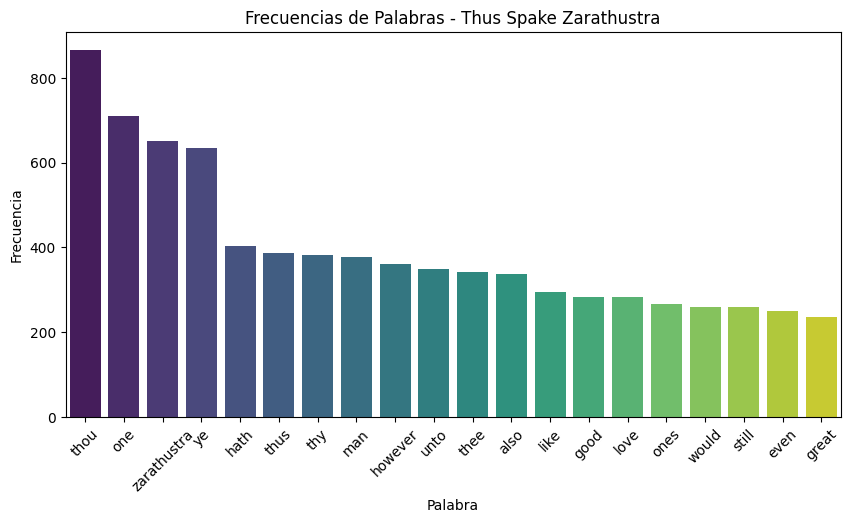

<ipython-input-24-9822f61a951b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Palabra', y='Frecuencia', data=df, palette='viridis')


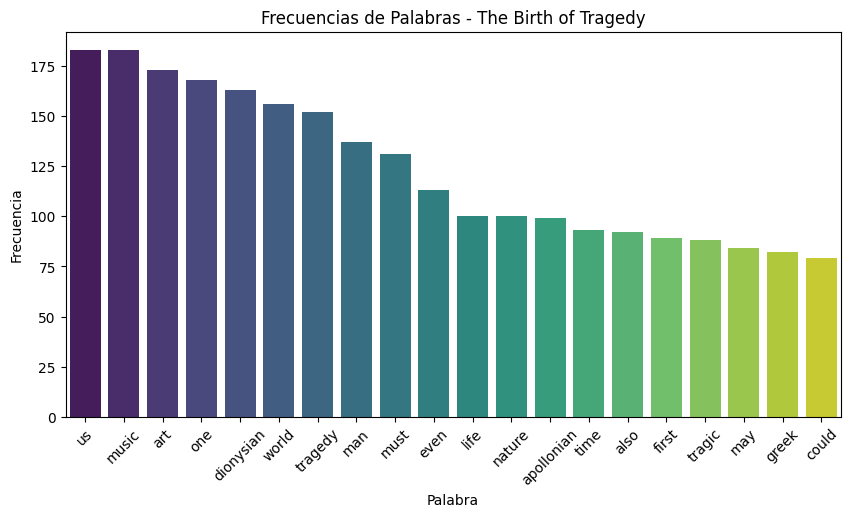

<ipython-input-24-9822f61a951b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Palabra', y='Frecuencia', data=df, palette='viridis')


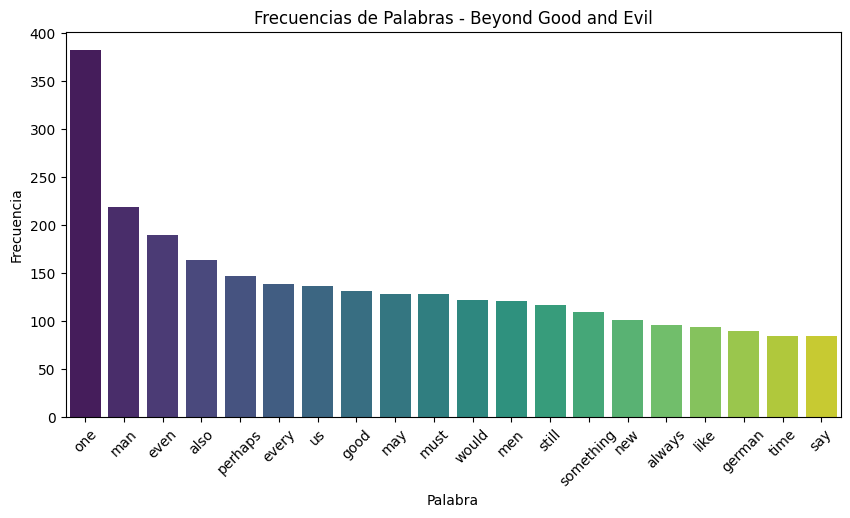

In [24]:
# Función para graficar las frecuencias de palabras
def plot_frequencies(fdist, title):
    df = pd.DataFrame(fdist.most_common(20), columns=['Palabra', 'Frecuencia'])
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Palabra', y='Frecuencia', data=df, palette='viridis')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Graficar las frecuencias de palabras para cada libro
plot_frequencies(fdist_zarath, 'Frecuencias de Palabras - Thus Spake Zarathustra')
plot_frequencies(fdist_birth, 'Frecuencias de Palabras - The Birth of Tragedy')
plot_frequencies(fdist_gye, 'Frecuencias de Palabras - Beyond Good and Evil')

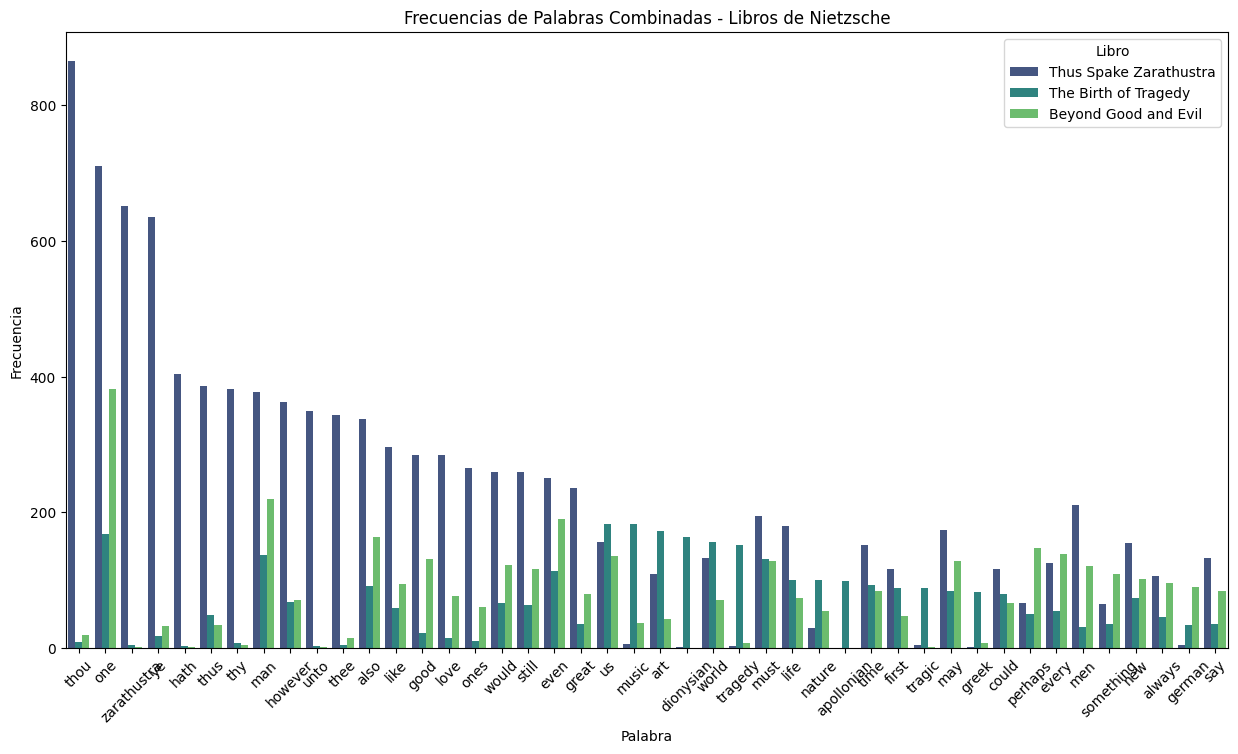

In [27]:
#palabras más comunes sin duplicados
def get_unique_words(fdist, existing_words):
    common_words = [word for word, freq in fdist.most_common(20) if word not in existing_words]
    return common_words

#palabras únicas
unique_words = []
unique_words += get_unique_words(fdist_zarath, unique_words)
unique_words += get_unique_words(fdist_birth, unique_words)
unique_words += get_unique_words(fdist_gye, unique_words)
# crear un df para la gráfica combinada
data_combined = []
for word in unique_words:
    if word in fdist_zarath:
        data_combined.append((word, fdist_zarath[word], 'Thus Spake Zarathustra'))
    if word in fdist_birth:
        data_combined.append((word, fdist_birth[word], 'The Birth of Tragedy'))
    if word in fdist_gye:
        data_combined.append((word, fdist_gye[word], 'Beyond Good and Evil'))

df_combined = pd.DataFrame(data_combined, columns=['Palabra', 'Frecuencia', 'Libro'])
# Graficar la frecuencia combinada
plt.figure(figsize=(15, 8))
sns.barplot(x='Palabra', y='Frecuencia', hue='Libro', data=df_combined, palette='viridis')
plt.title('Frecuencias de Palabras Combinadas - Libros de Nietzsche')
plt.xticks(rotation=45)
plt.show()


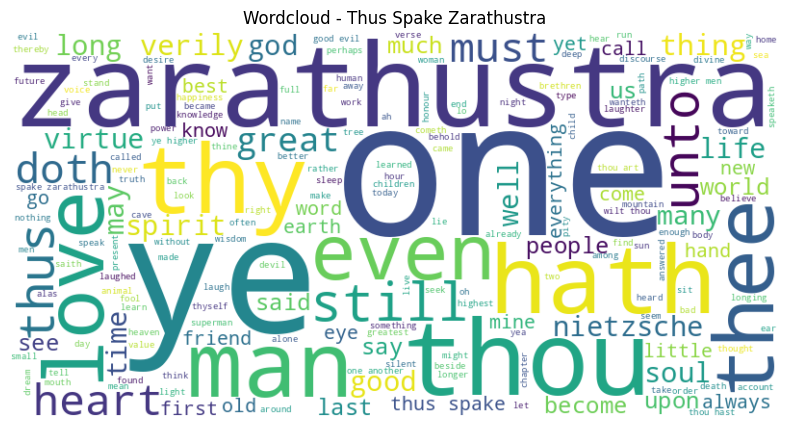

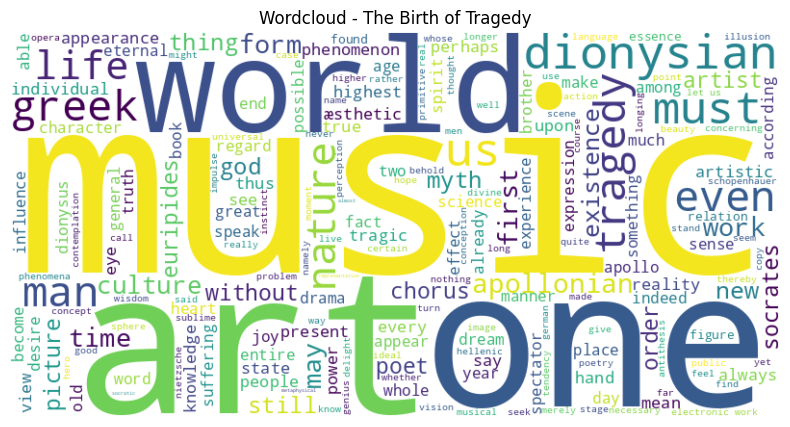

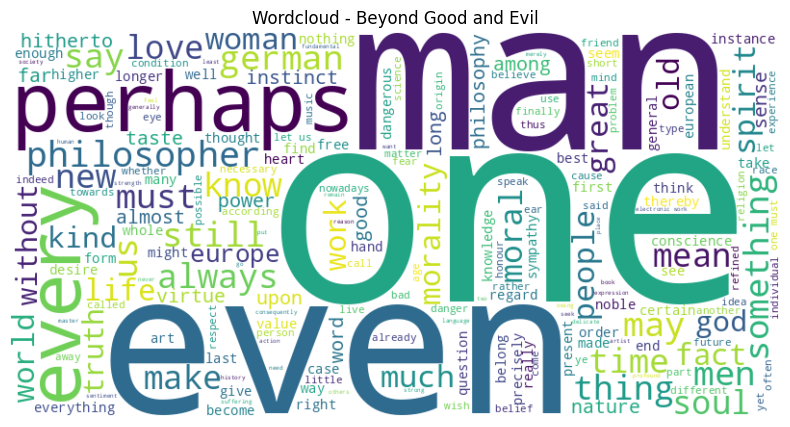

In [28]:
# Función para crear y mostrar wordcloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Crear y mostrar
create_wordcloud(' '.join(words_zarath), 'Wordcloud - Thus Spake Zarathustra')
create_wordcloud(' '.join(words_birth), 'Wordcloud - The Birth of Tragedy')
create_wordcloud(' '.join(words_gye), 'Wordcloud - Beyond Good and Evil')

In [29]:
# Contar el número de párrafos
num_paragraphs_zarath = text_zarath.count('\n\n')
num_paragraphs_birth = text_birth.count('\n\n')
num_paragraphs_gye = text_gye.count('\n\n')

print(f"Número de párrafos en 'Thus Spake Zarathustra': {num_paragraphs_zarath}")
print(f"Número de párrafos en 'The Birth of Tragedy': {num_paragraphs_birth}")
print(f"Número de párrafos en 'Beyond Good and Evil': {num_paragraphs_gye}")


Número de párrafos en 'Thus Spake Zarathustra': 4214
Número de párrafos en 'The Birth of Tragedy': 423
Número de párrafos en 'Beyond Good and Evil': 447


In [30]:
from nltk.util import ngrams
from collections import Counter

# Función para obtener n-grams
def get_ngrams(words, n):
    n_grams = ngrams(words, n)
    return Counter(n_grams)

# Obtener bigrams
bigrams_zarath = get_ngrams(words_zarath, 2)
bigrams_birth = get_ngrams(words_birth, 2)
bigrams_gye = get_ngrams(words_gye, 2)

# Imprimir los bigrams más comunes
print("Bigrams 'Thus Spake Zarathustra':", bigrams_zarath.most_common(5))
print("Bigrams 'The Birth of Tragedy':", bigrams_birth.most_common(5))
print("Bigrams 'Beyond Good and Evil':", bigrams_gye.most_common(10))


Bigrams 'Thus Spake Zarathustra': [(('thus', 'spake'), 126), (('spake', 'zarathustra'), 97), (('higher', 'men'), 79), (('thou', 'art'), 59), (('good', 'evil'), 49)]
Bigrams 'The Birth of Tragedy': [(('let', 'us'), 28), (('tragic', 'myth'), 18), (('greek', 'tragedy'), 16), (('electronic', 'works'), 16), (('united', 'states'), 15)]
Bigrams 'Beyond Good and Evil': [(('let', 'us'), 36), (('one', 'must'), 32), (('good', 'evil'), 18), (('would', 'like'), 17), (('one', 'may'), 17), (('modern', 'ideas'), 16), (('electronic', 'works'), 16), (('united', 'states'), 15), (('every', 'one'), 15), (('one', 'another'), 14)]
